# 06-01

- Only Spotify features (No Category ones)
- No transition Matrices
- Remove Constant Features
- BoxCox (Selectively)
- CenterScaling
- Euclidean Distance

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt 
import math
from ipynb.fs.full.Utils import createKDeplot, loadCoverGroups
import numpy as np
from sklearn.preprocessing import StandardScaler
from ipynb.fs.full.Pipeline import removeConstantFeatures, applyBoxCoxAllFeatures, centerAndScale, applyEuclideanDistance, getIndexAndVector, applyBoxCoxFeatures

In [40]:
cover = loadCoverGroups()
listCovers = cover[12]
originalSongId = listCovers[0]
coverSongId = listCovers[1]

In [41]:
df = pd.read_csv('./data/unified/05-RawData.csv')
encodedFeaturesNames = pd.read_csv('./data/unified/05-encodedFeatureNames.csv')
encodedFeaturesNames = encodedFeaturesNames['0'].values.tolist()

In [42]:
# Separating encodedFeatures from continous features
encodedFeatures = df[encodedFeaturesNames]
featuresToScale = df.drop(encodedFeaturesNames, axis=1)
featuresToScale = featuresToScale.iloc[:, 2:]
df = featuresToScale

In [43]:
df.id = df.id.astype('int64')
# Saving idChords
ids = df.id
df = df.set_index('id')
df.reset_index(drop=True, inplace=True)

In [44]:
df = df[['speechiness' ,'danceability', 'energy', 'acousticness', 'liveness', 'valence', 'tempo']]

In [45]:
df.head(1)

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
0,0.0432,0.494,0.756,0.0014,0.164,0.589,133.337


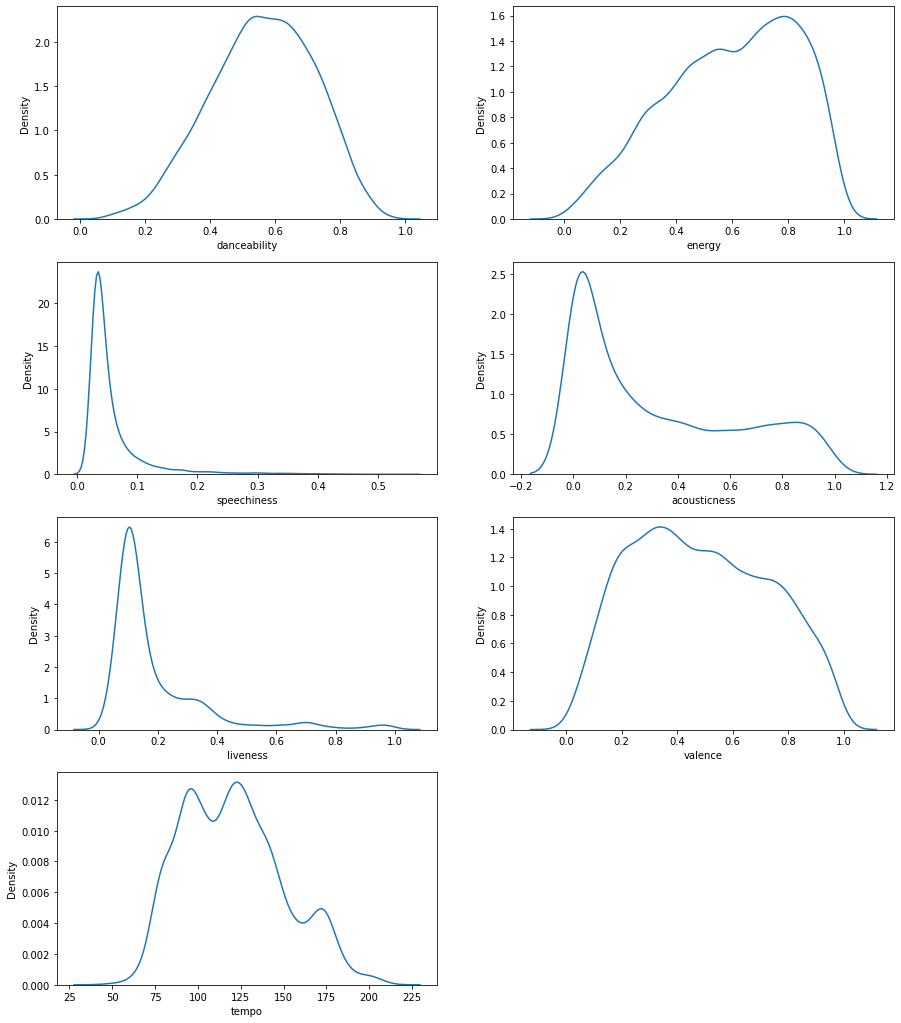

In [46]:
createKDeplot(df,['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'])

## Pipeline

In [47]:
df.loc[df.valence < 0]

,speechiness,danceability,energy,acousticness,liveness,valence,tempo


In [48]:
df.describe()

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
count,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000,5977.000000
mean,0.058008,0.561025,0.597416,0.320264,0.190890,0.485256,120.463851
std,0.052337,0.158634,0.229335,0.312234,0.172113,0.242251,29.617345
min,0.022400,0.065700,0.001880,0.000002,0.007860,0.000000,43.260000
25%,0.031800,0.452000,0.429000,0.039700,0.095300,0.287000,96.038000
50%,0.039700,0.567000,0.622000,0.204000,0.120000,0.469000,119.001000
75%,0.059500,0.679000,0.789000,0.578000,0.221000,0.681000,139.867000
max,0.542000,0.961000,0.993000,0.996000,0.993000,0.990000,214.017000


In [49]:
df = removeConstantFeatures(df)
df= applyBoxCoxFeatures(df, ['speechiness', 'acousticness', 'liveness', 'valence'])
df = centerAndScale(df)

mean:  [-0. -0.  0. -0. -0. -0.  0.]
std:  [1. 1. 1. 1. 1. 1. 1.]


In [50]:
df.describe()

,speechiness,danceability,energy,acousticness,liveness,valence,tempo
count,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03,5.977000e+03
mean,-5.896423e-16,-5.135594e-16,1.711865e-16,-8.083806e-17,-1.878296e-16,-2.377590e-16,1.509770e-16
std,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00
min,-1.636690e+00,-3.122705e+00,-2.597013e+00,-1.267955e+00,-2.963124e+00,-2.238570e+00,-2.606929e+00
25%,-8.119295e-01,-6.873345e-01,-7.344278e-01,-9.985327e-01,-6.986480e-01,-7.989614e-01,-8.247834e-01
50%,-2.648570e-01,3.766577e-02,1.072070e-01,-1.304365e-01,-2.895620e-01,-6.342971e-03,-4.939585e-02
75%,6.885674e-01,7.437530e-01,8.354609e-01,9.958662e-01,7.969099e-01,8.295618e-01,6.551827e-01
max,2.116112e+00,2.521580e+00,1.725064e+00,1.628777e+00,2.016907e+00,1.917364e+00,3.158993e+00


### After applying boxcox selectively

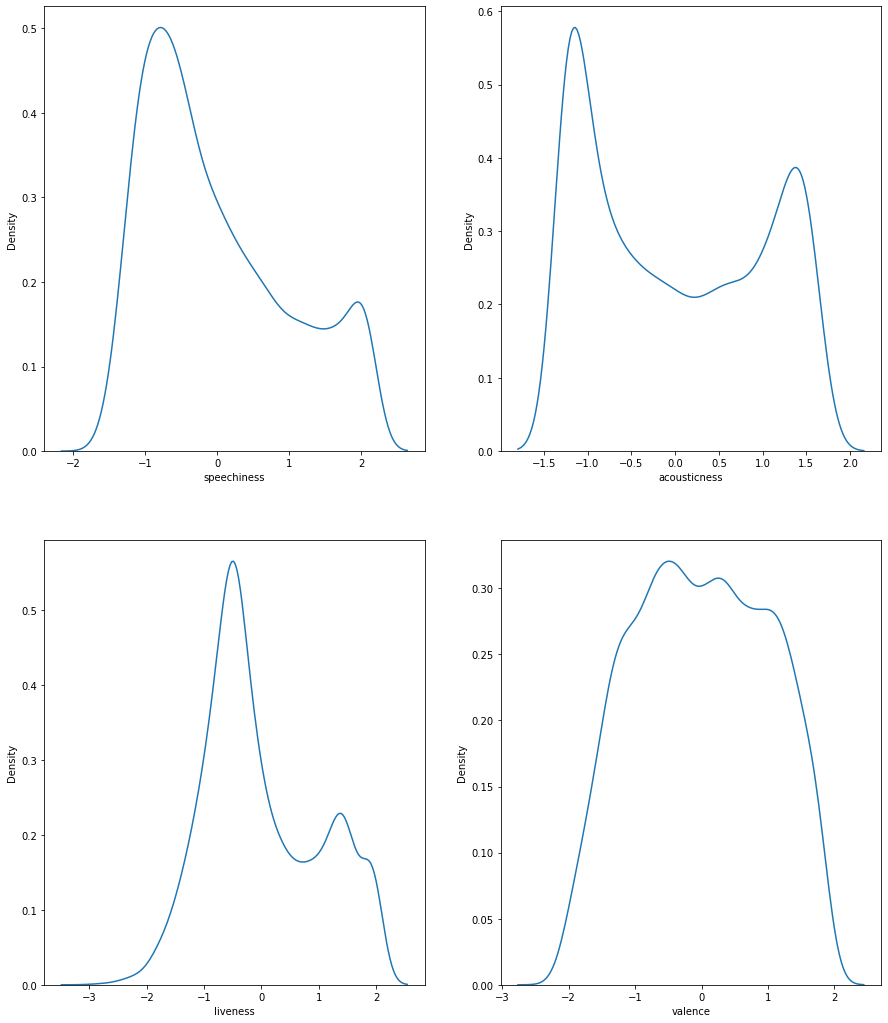

In [51]:
createKDeplot(df,['speechiness', 'acousticness', 'liveness', 'valence'])

### Original Song & Cover Song

In [52]:
originalSongIndex,originalSongVector = getIndexAndVector(originalSongId, ids, df)
coverIndex,coverSongVector = getIndexAndVector(coverSongId, ids, df)

### Get Rankings

In [53]:
ranksDF  = applyEuclideanDistance(df, ids, originalSongVector)

distance


In [54]:
ranksDF.head(10)

,id,rank
0,6001918,0.000000
1,6002482,0.907516
2,6002477,0.930364
3,147096,0.985801
4,6001999,1.025119
5,6001996,1.025540
6,1053660,1.142616
7,6001484,1.146766
8,6002050,1.201828
9,6001847,1.204244


In [55]:
ranksDF[ranksDF['id']==coverSongId]

,id,rank
2992,6001997,3.429537


🥳 First recommendation

In [56]:
ranksDF.loc[ranksDF.id.isin(listCovers)]

,id,rank
0,6001918,0.000000
2992,6001997,3.429537
